In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
results_df = pd.read_csv('../data/results.csv')
results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
0,Qwen2.5 7B Instruct,Zero-shot,NaN,NaN,20.00,69.0,30.3,18.1
1,Qwen2.5 7B Instruct,CoT,NaN,NaN,23.33,68.0,12.0,6.7
2,Qwen2.5 7B Instruct,CoT+BF,Wait,256.0,20.00,41.2,43.5,24.9
3,Qwen2.5 7B Instruct,CoT+BF,Wait,512.0,6.67,55.8,46.7,26.1
4,Qwen2.5 7B Instruct,CoT+BF,Wait,1024.0,26.67,64.4,50.2,26.3


In [3]:
results_df['Budget'].unique()

array([  nan,  256.,  512., 1024., 2048., 4096., 8192.])

In [4]:
selected_models = ["RFT", "simplescaling/s1.1-7B", "open-thoughts/OpenThinker3-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"]
results_df = results_df[results_df['Model'].isin(selected_models)]

results_df = results_df[results_df['Prompting'].isin(["CoT+BF"])]
results_df = results_df[results_df['Keyword'] == "Wait"]

results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
11,RFT,CoT+BF,Wait,256.0,16.67,41.2,36.9,24.3
12,RFT,CoT+BF,Wait,512.0,16.67,56.4,40.7,27.8
13,RFT,CoT+BF,Wait,1024.0,26.67,63.2,44.9,27.8
14,RFT,CoT+BF,Wait,2048.0,20.00,64.6,46.3,26.8
15,RFT,CoT+BF,Wait,4096.0,16.67,65.2,45.9,27.4


In [5]:
from plot_utils import format_budget_table

table_markdown = format_budget_table(results_df)
print(table_markdown)

| Model_Pretty    |   Budget |   AIME 2025 |   MATH500 |   MMLU Pro-1K |   SuperGPQA-1K |   Average |
|:----------------|---------:|------------:|----------:|--------------:|---------------:|----------:|
| RFT             |      256 |       16.67 |     41.20 |         36.90 |          24.30 |     29.77 |
| RFT             |      512 |       16.67 |     56.40 |         40.70 |          27.80 |     35.39 |
| RFT             |     1024 |       26.67 |     63.20 |         44.90 |          27.80 |     40.64 |
| RFT             |     2048 |       20.00 |     64.60 |         46.30 |          26.80 |     39.42 |
| RFT             |     4096 |       16.67 |     65.20 |         45.90 |          27.40 |     38.79 |
| RFT             |     8192 |       23.33 |     63.80 |         45.20 |          27.80 |     40.03 |
| s1.1-7B         |      256 |       16.67 |     63.00 |         53.10 |          28.80 |     40.39 |
| s1.1-7B         |      512 |       30.00 |     66.80 |         54.20 |          

In [6]:
# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'

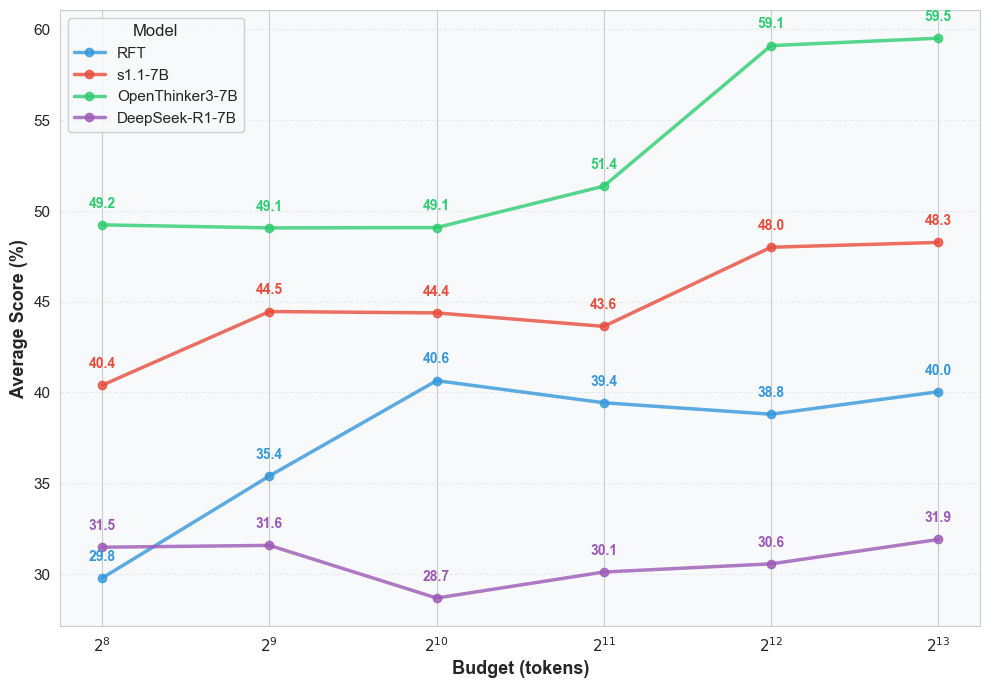

In [7]:
from plot_utils import prepare_budget_scaling_dataframe, plot_average_score_vs_budget

results_df = prepare_budget_scaling_dataframe(results_df)
plot_average_score_vs_budget(results_df)

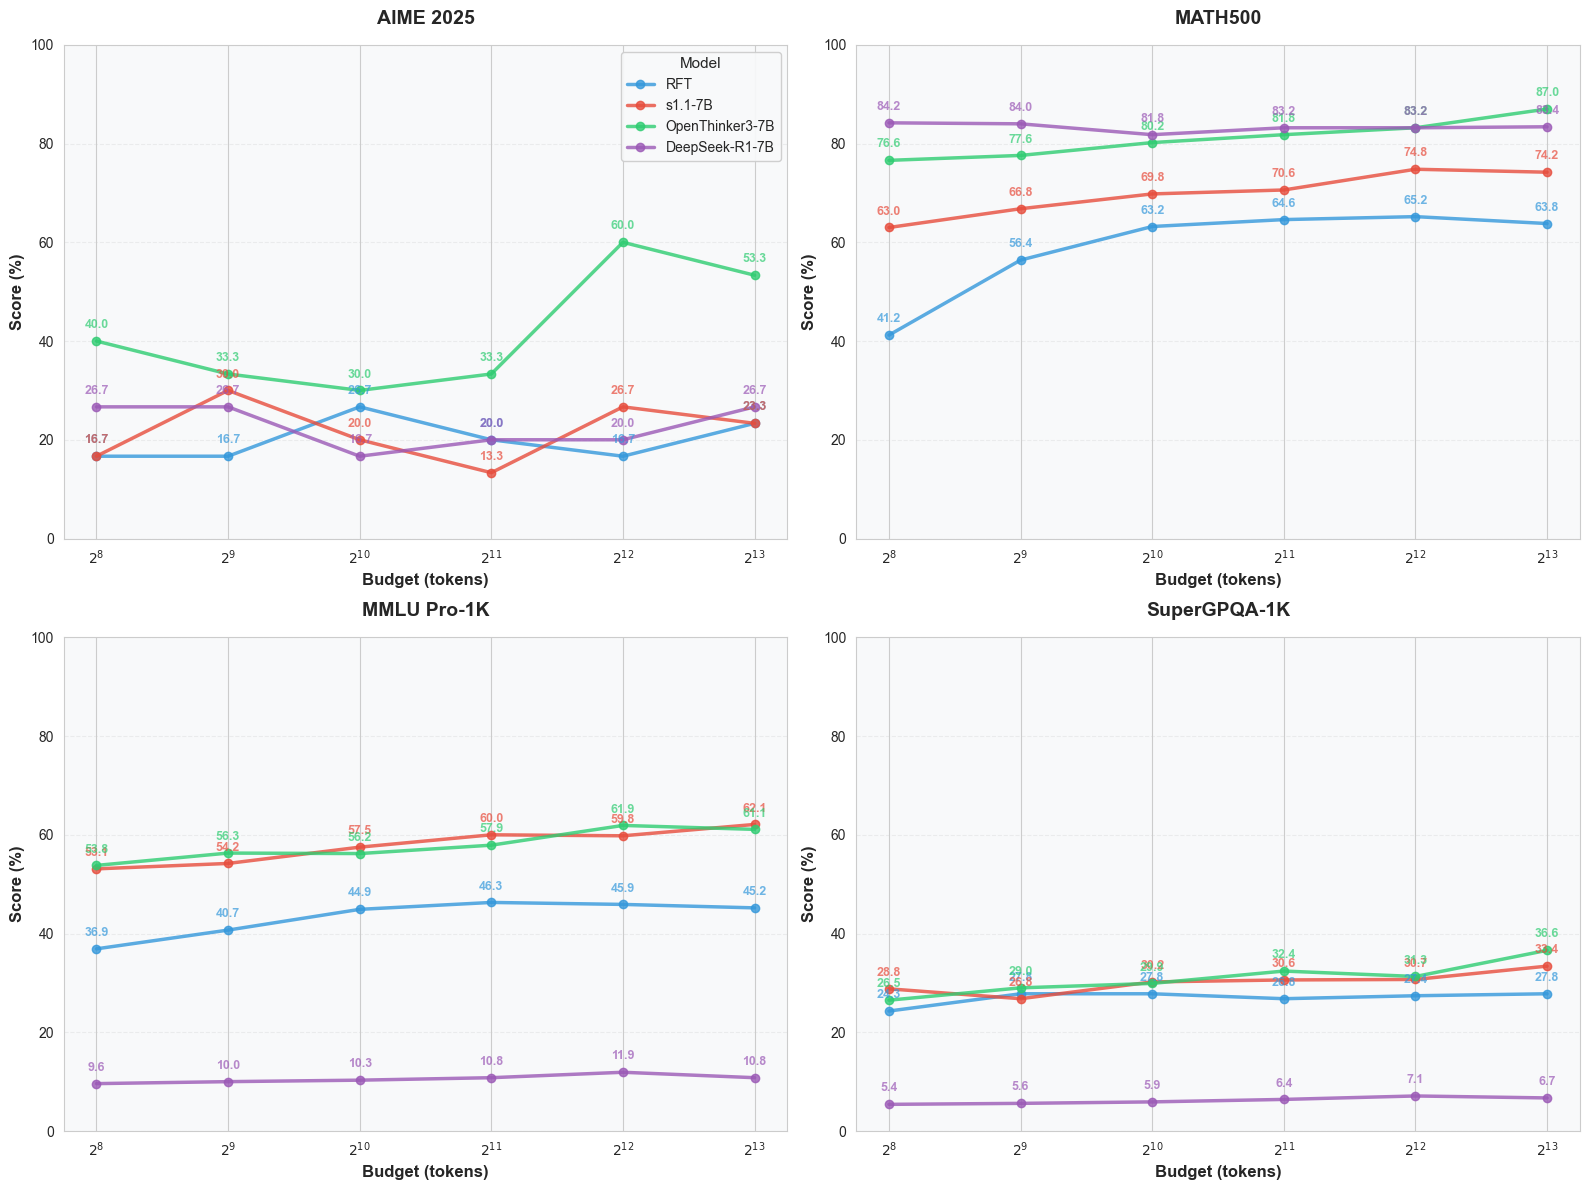

In [8]:
from plot_utils import plot_benchmark_subplots_vs_budget

plot_benchmark_subplots_vs_budget(results_df)


## 📊 Qwen2.5 7B Instruct Analysis


In [9]:
# Load data for Qwen model
qwen_df = pd.read_csv('../data/results.csv')
qwen_df = qwen_df[qwen_df['Model'] == "Qwen2.5 7B Instruct"]
qwen_df = qwen_df[qwen_df['Prompting'] == "CoT+BF"]
qwen_df = qwen_df[qwen_df['Keyword'] == "Wait"]
qwen_df.head()


,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
2,Qwen2.5 7B Instruct,CoT+BF,Wait,256.0,20.00,41.2,43.5,24.9
3,Qwen2.5 7B Instruct,CoT+BF,Wait,512.0,6.67,55.8,46.7,26.1
4,Qwen2.5 7B Instruct,CoT+BF,Wait,1024.0,26.67,64.4,50.2,26.3
5,Qwen2.5 7B Instruct,CoT+BF,Wait,2048.0,20.00,65.6,48.6,28.5
6,Qwen2.5 7B Instruct,CoT+BF,Wait,4096.0,20.00,64.4,48.4,28.3


In [10]:
# Display formatted table for Qwen model
qwen_table = format_budget_table(qwen_df)
print(qwen_table)


| Model_Pretty        |   Budget |   AIME 2025 |   MATH500 |   MMLU Pro-1K |   SuperGPQA-1K |   Average |
|:--------------------|---------:|------------:|----------:|--------------:|---------------:|----------:|
| Qwen2.5-7B Instruct |      256 |       20.00 |     41.20 |         43.50 |          24.90 |     32.40 |
| Qwen2.5-7B Instruct |      512 |        6.67 |     55.80 |         46.70 |          26.10 |     33.82 |
| Qwen2.5-7B Instruct |     1024 |       26.67 |     64.40 |         50.20 |          26.30 |     41.89 |
| Qwen2.5-7B Instruct |     2048 |       20.00 |     65.60 |         48.60 |          28.50 |     40.67 |
| Qwen2.5-7B Instruct |     4096 |       20.00 |     64.40 |         48.40 |          28.30 |     40.28 |
| Qwen2.5-7B Instruct |     8192 |       20.00 |     61.00 |         48.70 |          27.40 |     39.27 |


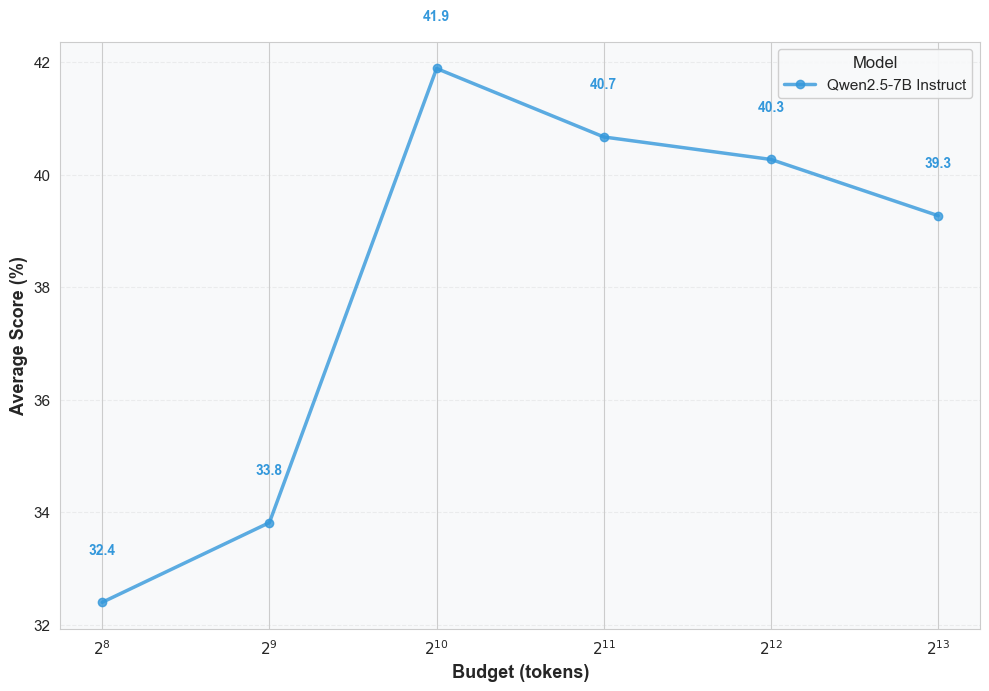

In [11]:
# Prepare data and plot average scores vs budget for Qwen model
qwen_df = prepare_budget_scaling_dataframe(qwen_df)
plot_average_score_vs_budget(qwen_df, output_path='outputs/fig_qwen_avg_score.png')


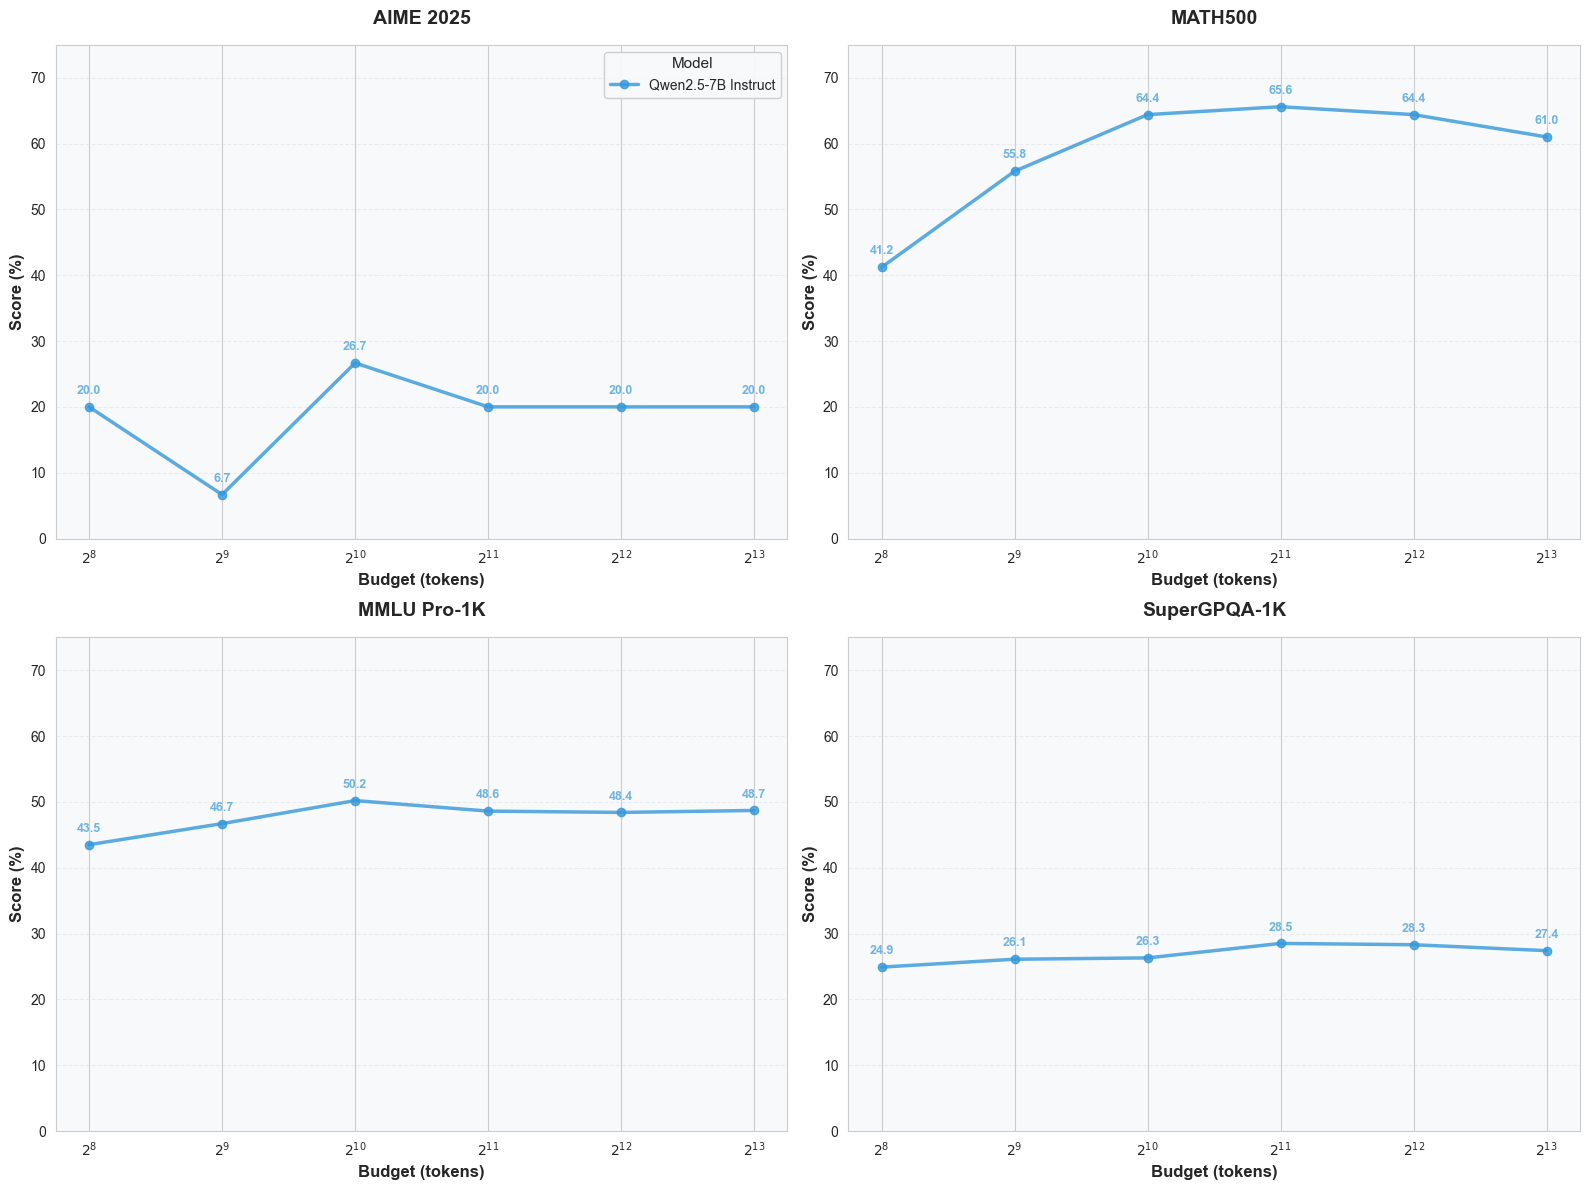

In [12]:
# Plot benchmark subplots for Qwen model
plot_benchmark_subplots_vs_budget(qwen_df, output_path='outputs/fig_qwen_benchmarks.png')
